# Projeto Final - Processamento de Imagens 2024.2

Autor: **Lorenzo Fontenelle Chaves**

Este notebook apresenta as soluções (teóricas e práticas) para as questões do projeto final da disciplina.

As questões foram resolvidas utilizando técnicas de processamento de imagens vistas em sala pelo professor Carlos Alexandre Barros de Mello, com código comentado e explicações detalhadas.

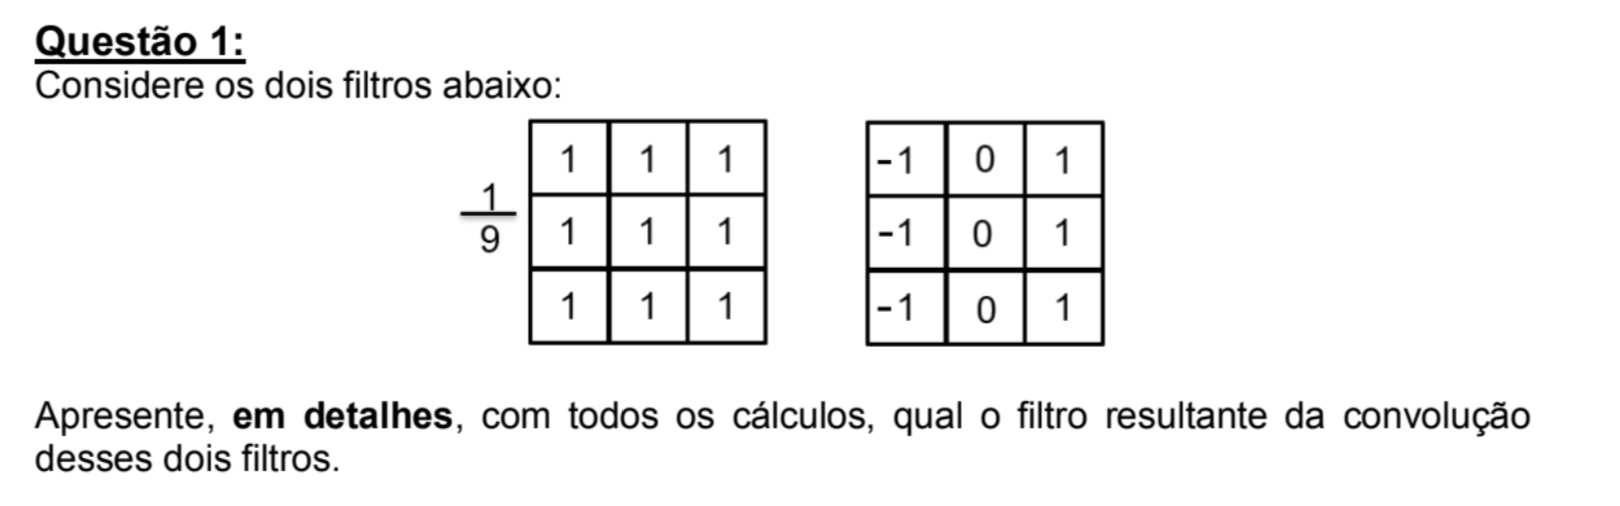

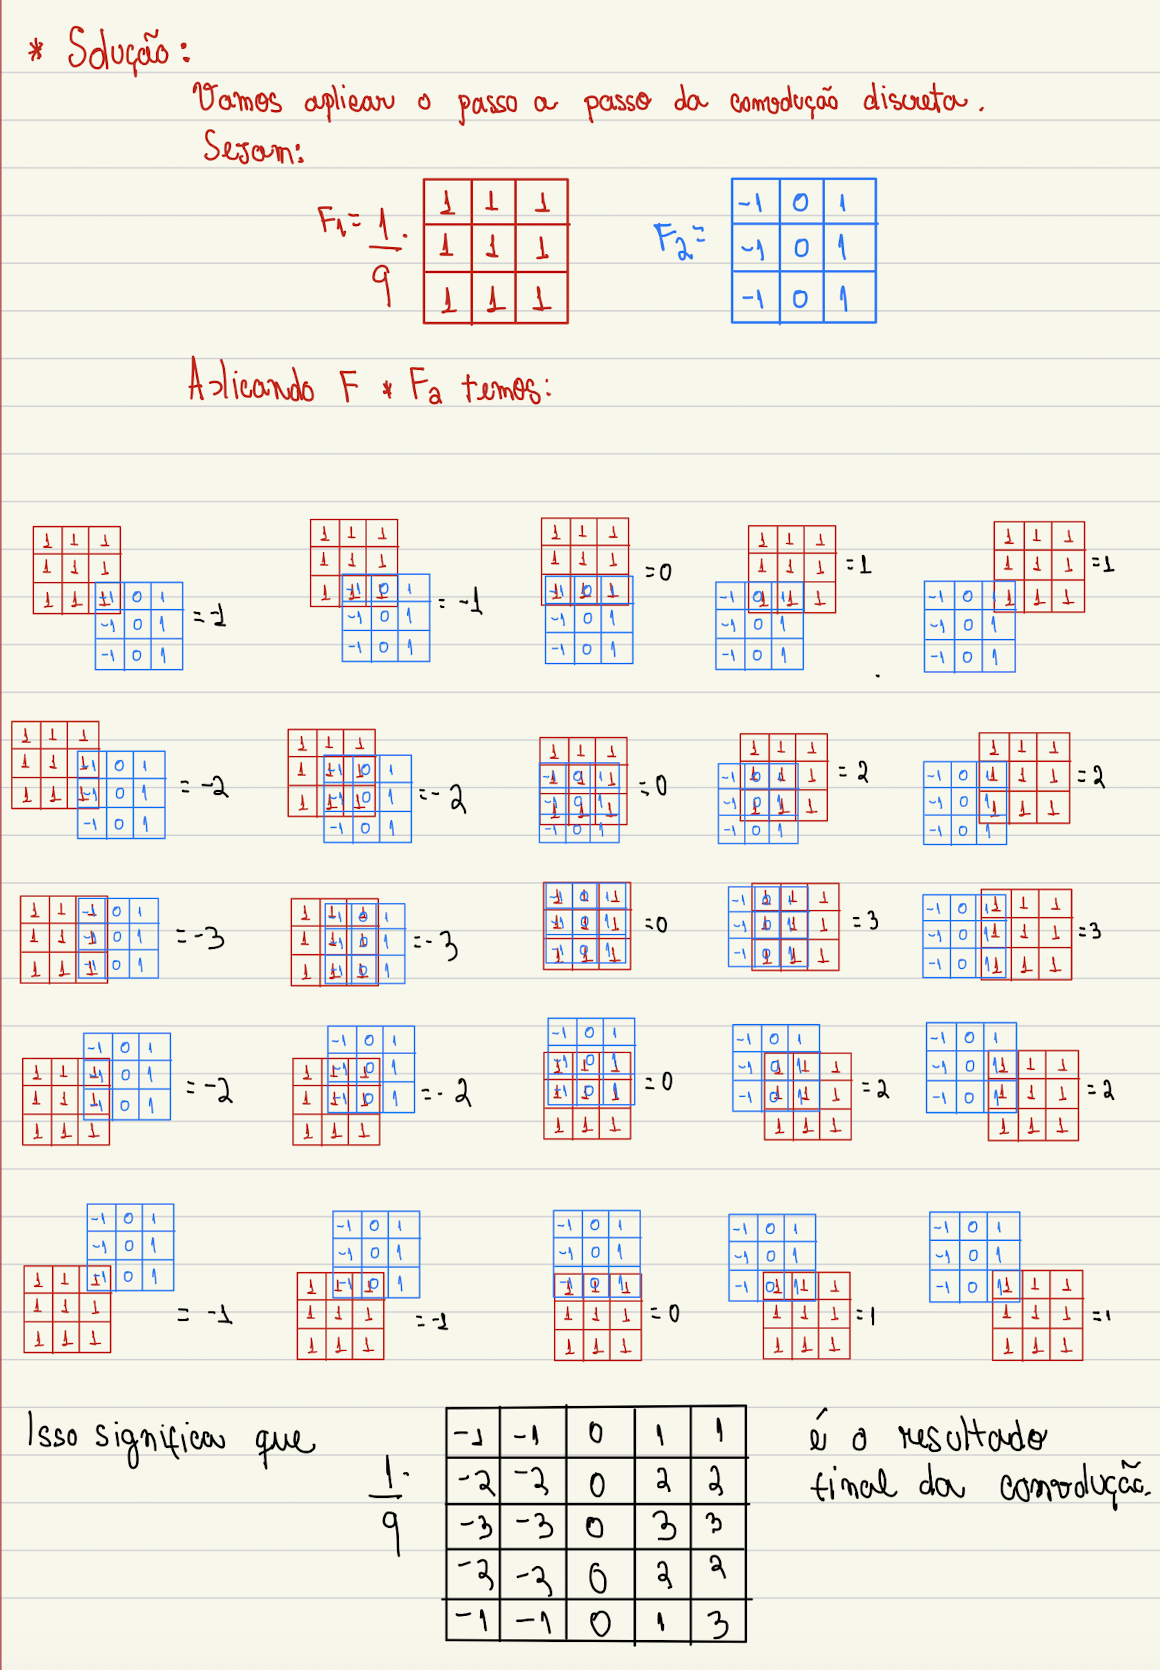

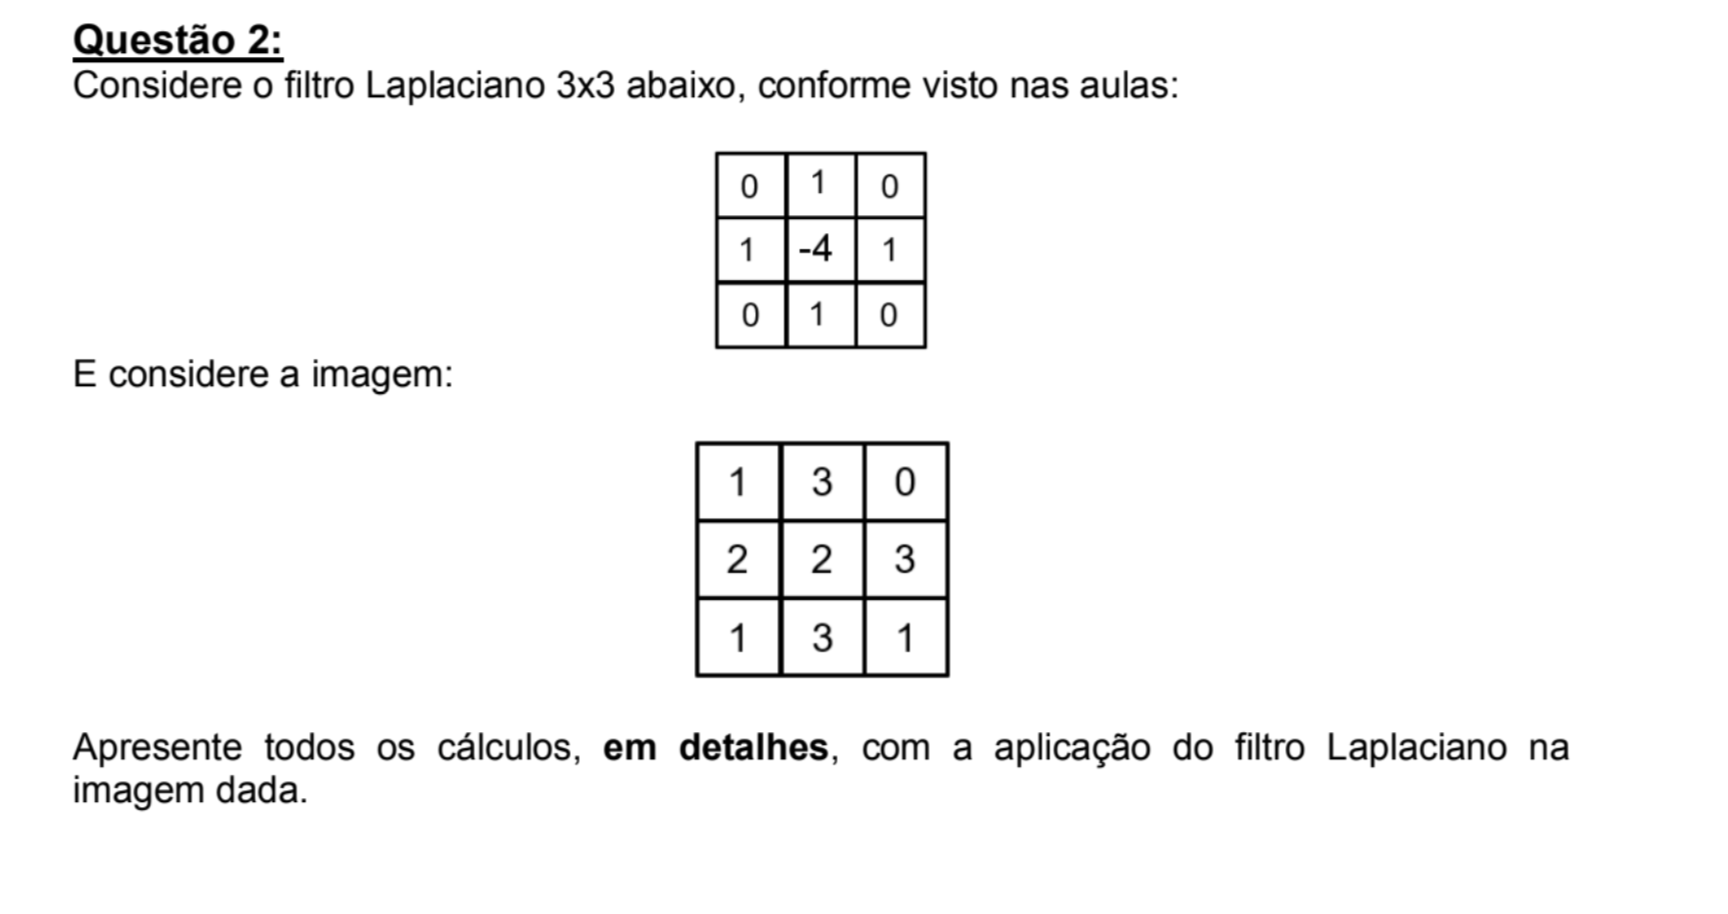

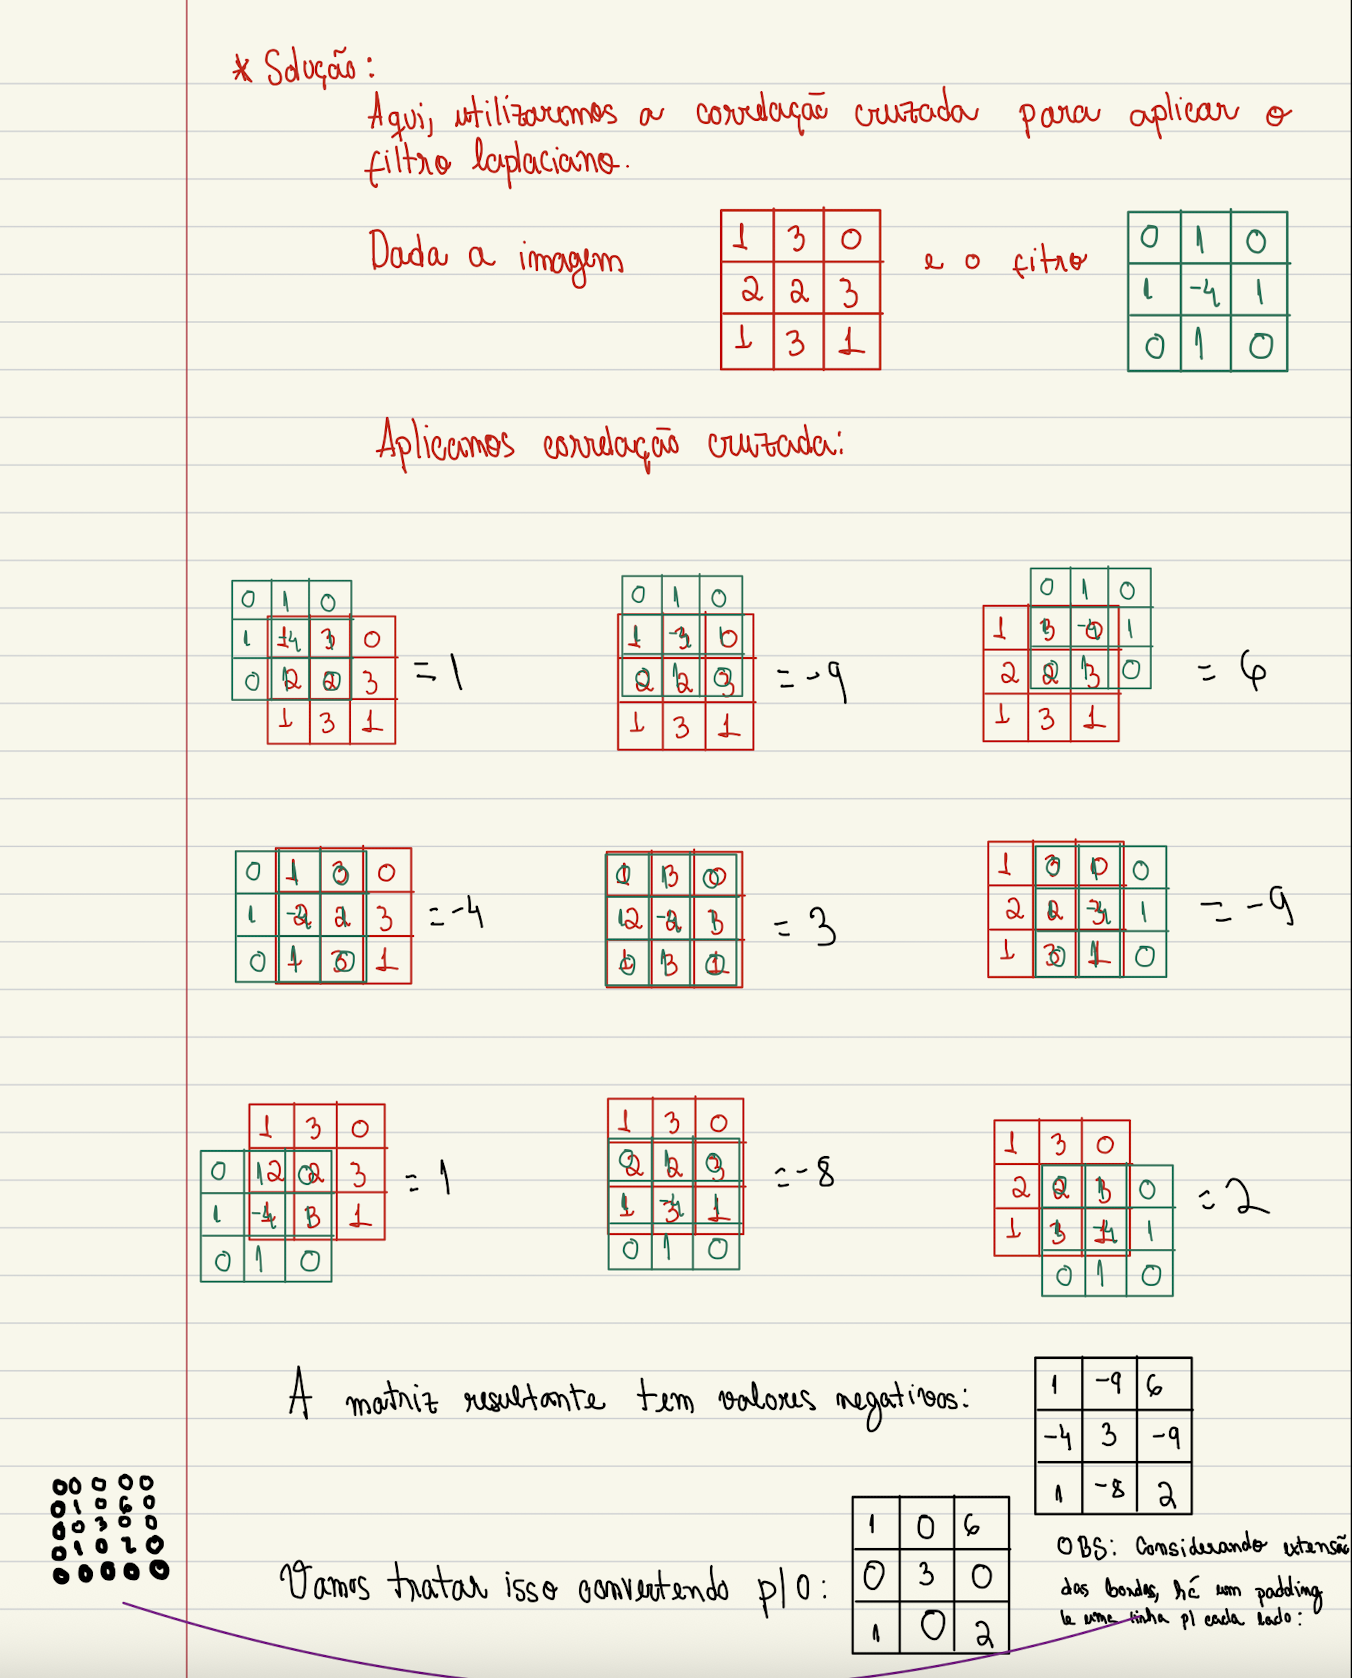

## Questão 3 - Filtro da raiz quadrada

O procedimento para esta questão é o seguinte:
1. Normalizar a imagem para que os valores dos pixels estejam entre 0 e 1 (dividindo por 255).
2. Calcular a raiz quadrada de cada pixel.
3. Desnormalizar a imagem (multiplicando os valores por 255).

O efeito esperado é um clareamento das regiões escuras, realçando detalhes em áreas com baixa intensidade.

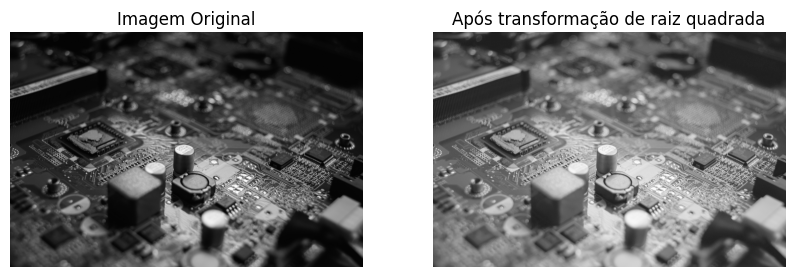

Podemos ver que após a transformação, a imagem mostra mais detalhes das regiões antes mais escuras.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar uma imagem. Garantimos que possa ser qualquer imagem em tons de cinza.
img = cv2.imread('./Imagens/q3.jpg', cv2.IMREAD_GRAYSCALE)

# Normalização
img_norm = img / 255.0

# Cálculo da raiz quadrada
img_sqrt = np.sqrt(img_norm)

# Desnormalização
img_result = np.uint8(img_sqrt * 255)

# Exibição das imagens
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Após transformação de raiz quadrada')
plt.imshow(img_result, cmap='gray')
plt.axis('off')
plt.show()

print('Podemos ver que após a transformação, a imagem mostra mais detalhes das regiões antes mais escuras.')

## Questão 4 - Avaliação de borramento

Nesta questão, comparamos duas imagens (cameraman_blur1.png e cameraman_blur2.png) para determinar automaticamente qual delas está mais borrada. Uma abordagem simples e eficiente e que não foge do domínio espacial da imagem é calcular a variância do Laplaciano: quanto menor a variância, maior o borramento. 

A função `variance_of_laplacian(image)` serve para medir a nitidez (ou, inversamente, o grau de borramento) de uma imagem. Ela funciona da seguinte maneira:

1. **Aplicação do Filtro Laplaciano:**  
   A função chama `cv2.Laplacian(image, cv2.CV_64F)`, que calcula a segunda derivada da imagem. O filtro Laplaciano realça regiões com transições bruscas de intensidade (ou seja, bordas e detalhes). O parâmetro `cv2.CV_64F` é usado para garantir alta precisão nos cálculos, evitando problemas com estouro de valores.

2. **Cálculo da Variância:**  
   Após aplicar o filtro, a função utiliza o método `.var()` para calcular a variância dos valores da imagem resultante.
   - **Imagem Nítida:** Apresenta muitas bordas e transições intensas, o que gera uma alta variância.  
   - **Imagem Borrada:** Tem poucas variações e bordas pouco definidas, resultando em uma baixa variância.

Variância do Laplaciano:
cameraman_blur1.png: 3.5500899724283954
cameraman_blur2.png: 1.9012524363934062
A imagem cameraman_blur2.png está mais borrada.


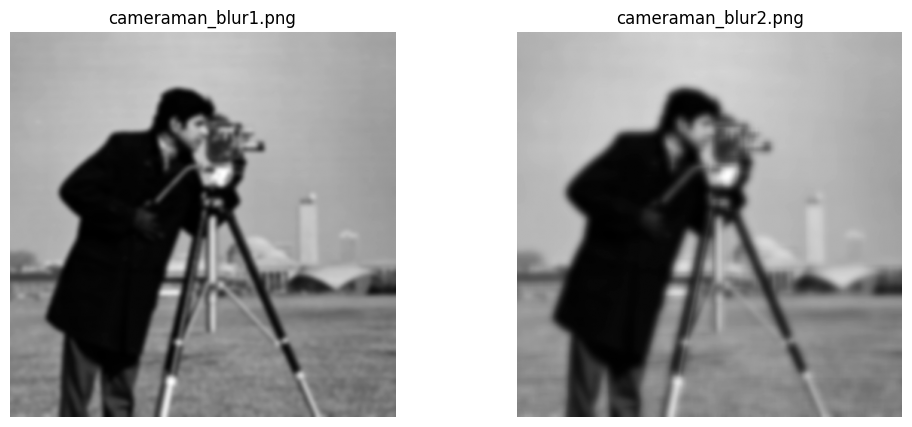

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar as imagens de borramento
img_blur1 = cv2.imread('./Imagens/Q4/cameraman_blur1.png', cv2.IMREAD_GRAYSCALE)
img_blur2 = cv2.imread('./Imagens/Q4/cameraman_blur2.png', cv2.IMREAD_GRAYSCALE)

def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

v1 = variance_of_laplacian(img_blur1)
v2 = variance_of_laplacian(img_blur2)

print('Variância do Laplaciano:')
print('cameraman_blur1.png:', v1)
print('cameraman_blur2.png:', v2)

if v1 < v2:
    print('A imagem cameraman_blur1.png está mais borrada.')
else:
    print('A imagem cameraman_blur2.png está mais borrada.')

# Exibição das imagens
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('cameraman_blur1.png')
plt.imshow(img_blur1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('cameraman_blur2.png')
plt.imshow(img_blur2, cmap='gray')
plt.axis('off')
plt.show()

# Questão 5 – Filtragem com Máscara Box e Máscaras Separáveis

Nesta questão, utilizamos a imagem `cameraman.bmp` para demonstrar duas abordagens de filtragem que produzem um efeito de embaçamento:

1. **Filtro Box 3×3 (Aplicação Direta):**  
   Este filtro é definido por:
   
   $$
   \text{Filtro Box} = \frac{1}{9}
   \begin{bmatrix}
   1 & 1 & 1 \\
   1 & 1 & 1 \\
   1 & 1 & 1
   \end{bmatrix}
   $$
   
   Ele realiza a média dos pixels em uma vizinhança 3×3, resultando em uma imagem borrada.

2. **Filtros Separáveis \( H1 \) e \( H2 \):**  
   Podemos decompor o filtro Box em duas máscaras separadas:
   
   - **\( H1 \)**: Máscara horizontal, 1×3, definida por:
   
     $$
     H_1 = \frac{1}{3} \,[\,1 \quad 1 \quad 1\,]
     $$
     
   - **\( H2 \)**: Máscara vertical, 3×1, definida por:
   
     $$
     H_2 = \frac{1}{3}
     \begin{bmatrix}
     1 \\
     1 \\
     1
     \end{bmatrix}
     $$
     
   Ao aplicar primeiro \(H1\) e depois \(H2\), o resultado deve ser equivalente à aplicação direta do filtro Box 3×3.
   
Nesta solução, vamos:
- **Parte A:** Aplicar \(H1\) e \(H2\) em duas etapas.
- **Parte B:** Aplicar diretamente o filtro Box 3×3.
- **Parte C:** Calcular a convolução das máscaras \(H1\) e \(H2\) para demonstrar sua equivalência.


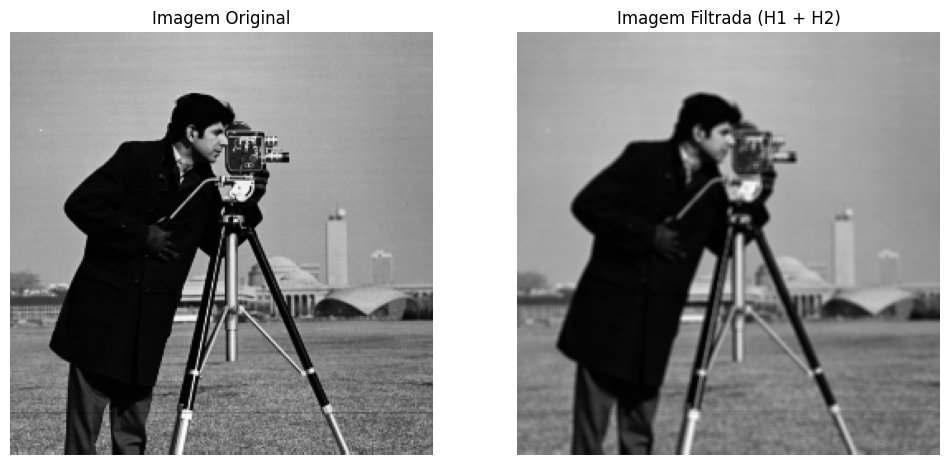

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em tons de cinza
img = cv2.imread('./Imagens/Q5/cameraman.bmp', cv2.IMREAD_GRAYSCALE)

# Definir as máscaras separáveis H1 e H2
H1 = np.array([[1, 1, 1]], dtype=np.float32) / 3.0  # Máscara horizontal (1x3)
H2 = np.array([[1], [1], [1]], dtype=np.float32) / 3.0 # Máscara vertical (3x1)

# Aplicar a filtragem em duas etapas:
img_H1 = cv2.filter2D(img, -1, H1)    # Primeiro, filtro horizontal
img_sep = cv2.filter2D(img_H1, -1, H2)  # Depois, filtro vertical

# Exibir as imagens original e filtrada lado a lado
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagem Filtrada (H1 + H2)")
plt.imshow(img_sep, cmap='gray')
plt.axis('off')

plt.show()


## Parte B – Filtragem com Filtro Box 3×3

Agora, aplicamos diretamente o filtro Box 3×3, definido por:

$$
\text{Filtro Box} = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$


b) Comparando o resultado desta filtragem com o obtido utilizando máscaras separáveis (Parte A), verificamos que ambos os métodos produzem imagens praticamente idênticas, o que evidencia a propriedade de separabilidade do filtro Box. Veja:


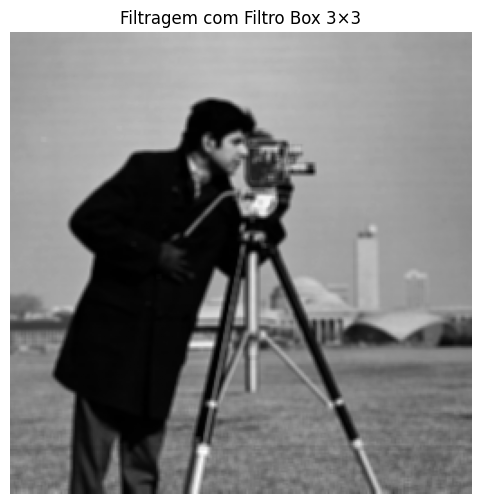

In [4]:
# Definir o filtro Box 3×3
box_filter = np.ones((3, 3), np.float32) / 9.0

# Aplicar o filtro Box 3×3 diretamente na imagem
img_box = cv2.filter2D(img, -1, box_filter)

# Exibir o resultado da filtragem com filtro Box
plt.figure(figsize=(6,6))
plt.title("Filtragem com Filtro Box 3×3")
plt.imshow(img_box, cmap='gray')
plt.axis('off')
plt.show()


## Parte C – Convolução das Máscaras \(H1\) e \(H2\)

Nesta etapa, calculamos a convolução das máscaras \(H1\) e \(H2\).


$$
H_1 = \frac{1}{3}\,[\,1 \quad 1 \quad 1\,]
\quad \text{e} \quad
H_2 = \frac{1}{3}
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$

resulta em:

$$
H_2 * H_1 = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

Isso confirma que a aplicação sequencial de \(H1\) e \(H2\) equivale à aplicação direta do filtro Box 3×3. Veja na prática:


In [5]:
# Calcular a convolução das máscaras H1 e H2 utilizando o produto externo
H_conv = np.outer(H2.flatten(), H1.flatten())

print("Máscara resultante da convolução de H1 e H2:")
print(H_conv)
print("Vemos que a máscara é exatamente o que esperávamos!!")

Máscara resultante da convolução de H1 e H2:
[[0.11111112 0.11111112 0.11111112]
 [0.11111112 0.11111112 0.11111112]
 [0.11111112 0.11111112 0.11111112]]
Vemos que a máscara é exatamente o que esperávamos!!


# Questão 6 – Detecção de M&M’s por Cor

Nesta questão, precisamos identificar se existem M&M’s de determinadas cores na imagem `MM.bmp`.

**Parte 1 – Detecção de M&M Azul:**

1. **Carregamento e Conversão:**  
   Aqui, vamos carregar e converter nossa imagem para o espaço de cores HSV, pois isso facilita a segmentação por cor.

2. **Definição da Faixa para Azul:**  
   Definimos uma faixa de valores no espaço HSV para identificar pixels azuis. Usaremos:  
   - **H (matiz):** 100 a 140  
   - **S (saturação):** 150 a 255  
   - **V (valor):** 50 a 255

3. **Geração da Máscara:**  
   Utilizamos `cv2.inRange` para criar uma máscara binária em que os pixels que se enquadram na faixa azul têm valor 255 e os demais, 0.

4. **Verificação:**  
   Se a contagem de pixels não nulos na máscara for maior que zero, significa que há M&M azul na imagem! :)

---

**Parte 2 – Detecção Conjunta de M&M Vermelho e Laranja:**

1. **Detecção do Vermelho:**  
     Para detectar o vermelho, vamos usar duas faixas de cor (devido à natureza cíclica do canal H em HSV).
   - Uma faixa baixa (usaremos H de 0 a 10)  
   - Outra faixa alta (usaremos H de 160 a 180)  
   As duas máscaras são combinadas.

2. **Detecção do Laranja:**  
   Definimos uma faixa típica para a cor laranja (usaremos H de 10 a 25, com S e V altos).

3. **Verificação Conjunta:**  
   Se ambas as máscaras (vermelho e laranja) apresentarem pixels com valor 255, concluímos que há M&M vermelho **e** laranja na imagem.

A seguir, o código que implementa esses passos, em ordem:


In [6]:
import cv2
import numpy as np

# Carregar a imagem dada.
img = cv2.imread('./Imagens/Q6/MM.bmp')

# Converter para o espaço HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Detectar M&M azul
lower_blue = np.array([100,150,50])
upper_blue = np.array([140,255,255])
mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

if cv2.countNonZero(mask_blue) > 0:
    print('Existe M&M azul na imagem.')
else:
    print('Não existe M&M azul na imagem.')

# Detectar M&M vermelho
lower_red1 = np.array([0,150,50])
upper_red1 = np.array([10,255,255])
mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
lower_red2 = np.array([160,150,50])
upper_red2 = np.array([180,255,255])
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2

# Detectar M&M laranja
lower_orange = np.array([10,150,50])
upper_orange = np.array([25,255,255])
mask_orange = cv2.inRange(img_hsv, lower_orange, upper_orange)

#Verificar se ambas as condições satisfazem...
if cv2.countNonZero(mask_red) > 0 and cv2.countNonZero(mask_orange) > 0:
    print('Existe M&M vermelho e laranja na imagem.')
else:
    print('Não existe M&M vermelho e laranja na imagem.')

Existe M&M azul na imagem.
Existe M&M vermelho e laranja na imagem.


## Questão 7 - Binarização da imagem rice.bmp

Nesta questão, a imagem `rice.bmp` deve ser binarizada de modo que os grãos de arroz apareçam em branco e o fundo em preto. Para isso, aplicaremos técnicas de pré processamento que serão detalhadas no código, passo a passo.

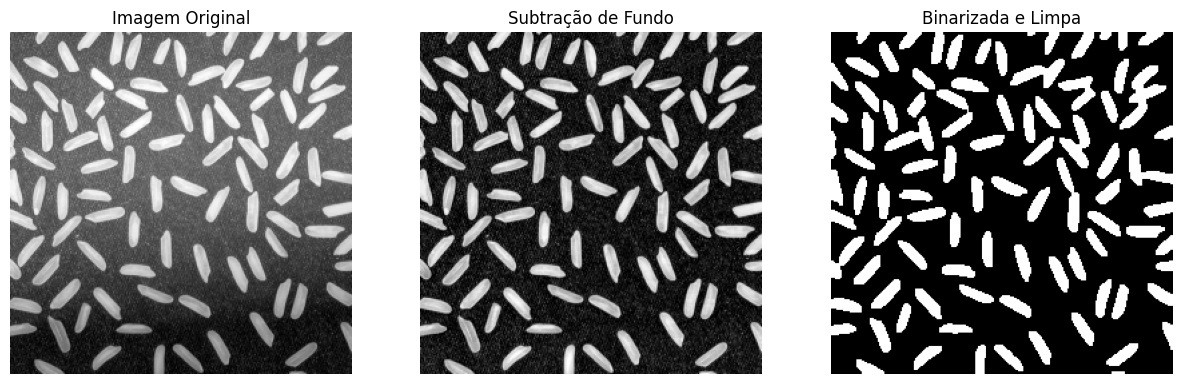

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem 'rice.bmp' em tons de cinza
img = cv2.imread('./Imagens/Q7/rice.bmp', cv2.IMREAD_GRAYSCALE)

# ============================
# Estimativa do Fundo
# ============================
# Criar um kernel grande (15x15) para realizar uma abertura morfológica.
# A abertura (erosão seguida de dilatação) remove pequenos objetos e detalhes,
# preservando as variações de fundo (iluminação gradual).
kernel_bg = np.ones((15,15), np.uint8)
background = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_bg)

# Subtrair o fundo da imagem original.
# Essa subtração realça os grãos de arroz, diminuindo a influência da iluminação não uniforme.
img_sub = cv2.subtract(img, background)

# ============================
# Binarização com Threshold de Otsu
# ============================
# Aplica o threshold de Otsu na imagem com fundo subtraído.
_, thresh_otsu_bg = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ============================
# Limpeza com Operações Morfológicas
# ============================
# Criar um kernel pequeno (3x3) para as operações morfológicas de limpeza.
kernel_clean = np.ones((3,3), np.uint8)

# Aplicar a operação de abertura (erosão seguida de dilatação)
# para remover pequenos pontos de ruído que possam ter sido segmentados erroneamente.
thresh_clean = cv2.morphologyEx(thresh_otsu_bg, cv2.MORPH_OPEN, kernel_clean)

# Aplicar a operação de fechamento (dilatação seguida de erosão)
# para preencher pequenos buracos ou lacunas dentro dos grãos segmentados.
thresh_clean = cv2.morphologyEx(thresh_clean, cv2.MORPH_CLOSE, kernel_clean)

# ============================
# Exibição dos Resultados
# ============================
plt.figure(figsize=(15,5))

# Exibe a imagem original
plt.subplot(1,3,1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Exibe a imagem após subtração do fundo
plt.subplot(1,3,2)
plt.title('Subtração de Fundo')
plt.imshow(img_sub, cmap='gray')
plt.axis('off')

# Exibe a imagem final após binarização e limpeza
plt.subplot(1,3,3)
plt.title('Binarizada e Limpa')
plt.imshow(thresh_clean, cmap='gray')
plt.axis('off')

plt.show()

## Questão 8 - Limpeza das imagens Circle_noise.bmp e Binary_Noise.bmp

Quando a imagem é estritamente binária e muito pontilhada, como é o caso da imagem Binary_Noise.bmp as técnicas de filtragem espacial (erosao seguida de dilatacao etc) podem remover ruído, mas às vezes deixamou deformam um pouco o objeto. Por isso, a melhor solução encontrada por mim foi realizando a filtragem no domínio da frequência para suavizar as regiões pontilhadas, e depois rebinarizar a imagem. Para a imagem dos circulos, uma simples limpeza morfologica(abetura e fechamento) resolveu.

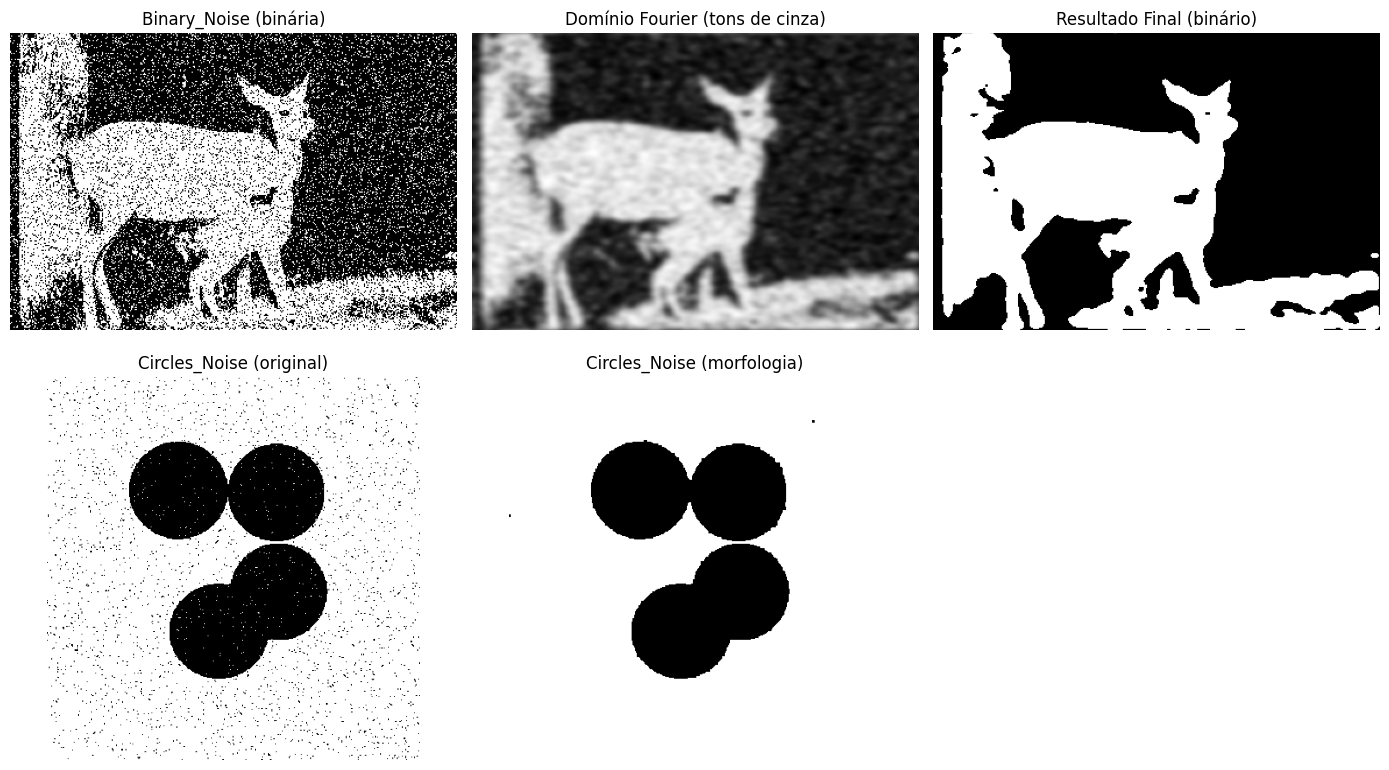

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) Filtro passa-baixa Gaussiano no domínio de Fourier
# ---------------------------------------------------------
def filtro_passa_baixa_gaussiano(dft_shifted, raio=30):
    """
    Recebe o espectro shiftado (centrado) da DFT de uma imagem e
    aplica um filtro gaussiano passa-baixa de determinado raio.
    """
    rows, cols = dft_shifted.shape[:2]
    crow, ccol = rows//2, cols//2  # centro da imagem

    # Cria máscara gaussiana
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = np.exp(-(dist**2) / (2*(raio**2)))
    
    # Para imagem em tons de cinza, a DFT tem 2 canais (parte real e imaginária).
    dft_shifted[:, :, 0] *= mask
    dft_shifted[:, :, 1] *= mask

    return dft_shifted

# ---------------------------------------------------------
# 2) Função para limpeza morfológica (Circles_Noise)
# ---------------------------------------------------------
def limpar_imagem_binaria(img, kernel_size=3, n_iter=1):
    """
    Recebe uma imagem binária (ou em tons de cinza) e aplica:
      - Threshold para garantir binário
      - Abertura (OPEN) + Fechamento (CLOSE) para remover ruídos
    Retorna a imagem resultante (binária).
    """
    # Threshold para garantir binário
    _, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Elemento estruturante
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)

    # Abertura (remove pontinhos brancos)
    img_open = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=n_iter)
    
    # Fechamento (remove pontinhos pretos e preenche possíveis buracos)
    img_close = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, kernel, iterations=n_iter)
    
    return img_close

# ---------------------------------------------------------
# Caminhos das imagens
# ---------------------------------------------------------
caminho_binary  = "./Imagens/Q8/Binary_Noise.bmp"
caminho_circle  = "./Imagens/Q8/Circles_Noise.bmp"

# ---------------------------------------------------------
# A) Processar Binary_Noise.bmp com Fourier Passa-Baixa
# ---------------------------------------------------------
img_bin_noise = cv2.imread(caminho_binary, cv2.IMREAD_GRAYSCALE)

# 1) Garante que seja binária
_, img_bin_noise_thr = cv2.threshold(img_bin_noise, 127, 255, cv2.THRESH_BINARY)

# 2) Calcular DFT e fazer shift do zero-frequência pro centro
dft_bin = cv2.dft(np.float32(img_bin_noise_thr), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_bin_shifted = np.fft.fftshift(dft_bin)

# 3) Aplicar filtro gaussiano passa-baixa no domínio de Fourier
raio = 20  # ajuste conforme necessidade
dft_filtrado = filtro_passa_baixa_gaussiano(dft_bin_shifted, raio=raio)

# 4) Desfazer shift e calcular Inversa da DFT
dft_inv_shifted = np.fft.ifftshift(dft_filtrado)
img_back = cv2.idft(dft_inv_shifted)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 5) Normalizar para exibir
img_back_norm = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# 6) Rebinarizar
_, img_bin_final = cv2.threshold(img_back_norm, 127, 255, cv2.THRESH_BINARY)

# ---------------------------------------------------------
# B) Processar Circles_Noise.bmp com Limpeza Morfológica
# ---------------------------------------------------------
img_circle_noise = cv2.imread(caminho_circle, cv2.IMREAD_GRAYSCALE)
img_circle_clean = limpar_imagem_binaria(img_circle_noise, kernel_size=3, n_iter=1)

# ---------------------------------------------------------
# Exibir resultados em subplots
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# (Linha 1) Binary_Noise
axes[0, 0].imshow(img_bin_noise_thr, cmap='gray')
axes[0, 0].set_title("Binary_Noise (binária)")
axes[0, 0].axis('off')

axes[0, 1].imshow(img_back_norm, cmap='gray')
axes[0, 1].set_title("Domínio Fourier (tons de cinza)")
axes[0, 1].axis('off')

axes[0, 2].imshow(img_bin_final, cmap='gray')
axes[0, 2].set_title("Resultado Final (binário)")
axes[0, 2].axis('off')

# (Linha 2) Circles_Noise
axes[1, 0].imshow(img_circle_noise, cmap='gray')
axes[1, 0].set_title("Circles_Noise (original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(img_circle_clean, cmap='gray')
axes[1, 1].set_title("Circles_Noise (morfologia)")
axes[1, 1].axis('off')

# só para manter simetria, deixamos a última como espaço vazio
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


## Questão 9 - Detecção da letra A em imagens de livros

Nesta questão, deve-se verificar se as imagens `Book_1.bmp` e `Book_2.bmp` contêm a letra **A** maiúscula. Verificamos se há a letra 'A' maiúscula em uma imagem, utilizando um template gerado dinamicamente e redimensionado de acordo com o tamanho da imagem.


In [9]:
import cv2
import numpy as np

img_teste1 = "./Imagens/Q9/Book_1.bmp"
img_teste2 = "./Imagens/Q9/Book_2.bmp"

def escanear_caractere_principal(caminho_imagem, padrao_A, fator_altura, limite_sim):
    # 1) Ler a imagem em escala de cinza
    img_cinza = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    if img_cinza is None:
        print(f"Não foi possível abrir a imagem: {caminho_imagem}")
        return False

    # 2) Aplicar binarização adaptativa (inverte para texto claro, se necessário)
    img_bin = cv2.adaptiveThreshold(
        img_cinza,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        2
    )

    # 3) Definir dimensões do template de acordo com a altura da imagem
    linhas, colunas = img_bin.shape
    altura_pad = int(linhas * fator_altura)
    largura_pad = int(linhas * fator_altura)
    if altura_pad < 1 or largura_pad < 1:
        # Se a imagem for muito pequena, abortar
        return False

    # 4) Redimensionar o template
    padrao_redim = cv2.resize(padrao_A, (largura_pad, altura_pad))

    # 5) Realizar matchTemplate
    correlacao = cv2.matchTemplate(img_bin, padrao_redim, cv2.TM_CCORR_NORMED)
    _, maior_valor, _, _ = cv2.minMaxLoc(correlacao)

    # 6) Checar resultado
    if maior_valor > limite_sim:
        print(f"Encontrado 'A' em {caminho_imagem}")
        return True
    else:
        print(f"Nenhum 'A' detectado em {caminho_imagem}")
        return False

# ---------------------------------------------------------------
# Geração de um template de 'A' fixo
# ---------------------------------------------------------------
tam_padrao = 100
template_cru = np.zeros((tam_padrao, tam_padrao), dtype=np.uint8)
fonte_cv = cv2.FONT_HERSHEY_SIMPLEX
escala_fonte = 2.0
espessura = 4
(dimensao_texto, _) = cv2.getTextSize("A", fonte_cv, escala_fonte, espessura)
larg_txt, alt_txt = dimensao_texto
pos_x = (tam_padrao - larg_txt) // 2
pos_y = (tam_padrao + alt_txt) // 2

cv2.putText(template_cru, "A", (pos_x, pos_y), fonte_cv, escala_fonte, 255, espessura, cv2.LINE_AA)

res1 = escanear_caractere_principal(img_teste1, template_cru, fator_altura=0.09, limite_sim=0.5)
res2 = escanear_caractere_principal(img_teste2, template_cru, fator_altura=0.09, limite_sim=0.5)



Encontrado 'A' em ./Imagens/Q9/Book_1.bmp
Nenhum 'A' detectado em ./Imagens/Q9/Book_2.bmp
